
<a id='julia-essentials'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Julia Essentials

## Contents

- [Julia Essentials](#Julia-Essentials)  
  - [Overview](#Overview)  
  - [Common Data Types](#Common-Data-Types)  
  - [Iterating](#Iterating)  
  - [Comparisons and Logical Operators](#Comparisons-and-Logical-Operators)  
  - [User-Defined Functions](#User-Defined-Functions)  
  - [Broadcasting](#Broadcasting)  
  - [Scoping and Closures](#Scoping-and-Closures)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

Having covered a few examples, let’s now turn to a more systematic exposition
of the essential features of the language.

## Overview

Topics:

- Common data types  
- Iteration  
- More on user-defined functions  
- Comparisons and logic  

### Setup

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.4.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.4.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

## Common Data Types

Like most languages, Julia language defines and provides functions for operating on standard data types such as

- integers  
- floats  
- strings  
- arrays, etc…  


Let’s learn a bit more about them.

### Primitive Data Types

A particularly simple data type is a Boolean value, which can be either `true` or
`false`.

In [3]:
x = true

true

In [4]:
typeof(x)

Bool

In [5]:
y = 1 > 2  # now y = false

false

The two most common data types used to represent numbers are integers and
floats.

(Computers distinguish between floats and integers because arithmetic is
handled in a different way)

In [6]:
typeof(1.0)

Float64

In [7]:
typeof(1)

Int64

If you’re running a 32 bit system you’ll still see `Float64`, but you will see `Int32` instead of `Int64` (see [the section on Integer types](https://docs.julialang.org/en/v1.1/manual/integers-and-floating-point-numbers/#Integers-1) from the Julia manual).

Arithmetic operations are fairly standard.

In [8]:
x = 2; y = 1.0;

The `;` can be used to suppress output from a line of code, or to combine two lines of code together (as above), but is otherwise not necessary.

In [9]:
x * y

2.0

In [10]:
x^2

4

In [11]:
y / x

0.5

Although the `*` can be omitted for multiplication between a numeric literal and a variable.

In [12]:
2x - 3y

1.0

A useful tool for displaying both expressions and code is to use the `@show` macro, which displays the text and the results.

In [13]:
@show 2x - 3y
@show x + y;

2x - 3y = 1.0
x + y = 3.0


Here we have used `;` to suppress the output on the last line, which otherwise returns the results of `x + y`.

Complex numbers are another primitive data type, with the imaginary part being specified by `im`.

In [14]:
x = 1 + 2im

1 + 2im

In [15]:
y = 1 - 2im

1 - 2im

In [16]:
x * y  # complex multiplication

5 + 0im

There are several more primitive data types that we’ll introduce as necessary.

### Strings

A string is a data type for storing a sequence of characters.

In Julia, strings are created using double quotation marks (single quotations are
reserved for the character type).

In [17]:
x = "foobar"

"foobar"

In [18]:
typeof(x)

String

You’ve already seen examples of Julia’s simple string formatting operations.

In [19]:
x = 10; y = 20

20

The `\$` inside of a string is used to interpolate a variable.

In [20]:
"x = $x"

"x = 10"

With parentheses, you can splice the results of expressions into strings as well.

In [21]:
"x + y = $(x + y)"

"x + y = 30"

To concatenate strings use `*`

In [22]:
"foo" * "bar"

"foobar"

Julia provides many functions for working with strings.

In [23]:
s = "Charlie don't surf"

"Charlie don't surf"

In [24]:
split(s)

3-element Array{SubString{String},1}:
 "Charlie"
 "don't"  
 "surf"   

In [25]:
replace(s, "surf" => "ski")

"Charlie don't ski"

In [26]:
split("fee,fi,fo", ",")

3-element Array{SubString{String},1}:
 "fee"
 "fi" 
 "fo" 

In [27]:
strip(" foobar ")  # remove whitespace

"foobar"

Julia can also find and replace using [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) ([see regular expressions documentation](https://docs.julialang.org/en/v1/manual/strings/#Regular-Expressions-1) for more info).

In [28]:
match(r"(\d+)", "Top 10")  # find digits in string

RegexMatch("10", 1="10")

### Containers

Julia has several basic types for storing collections of data.

We have already discussed arrays.

A related data type is a **tuple**, which is immutable and can contain different types.

In [29]:
x = ("foo", "bar")
y = ("foo", 2)

("foo", 2)

In [30]:
typeof(x), typeof(y)

(Tuple{String,String}, Tuple{String,Int64})

An immutable value is one that cannot be altered once it resides in memory.

In particular, tuples do not support item assignment (i.e. `x[1] = "test"` would fail).

Tuples can be constructed with or without parentheses.

In [31]:
x = "foo", 1

("foo", 1)

In [32]:
function f()
    return "foo", 1
end
f()

("foo", 1)

Tuples can also be unpacked directly into variables.

In [33]:
x = ("foo", 1)

("foo", 1)

In [34]:
word, val = x
println("word = $word, val = $val")

word = foo, val = 1


Tuples can be created with a hanging `,` – this is useful to create a tuple with one element.

In [35]:
x = ("foo", 1,)
y = ("foo",)
typeof(x), typeof(y)

(Tuple{String,Int64}, Tuple{String})

#### Referencing Items

The last element of a sequence type can be accessed with the keyword `end`.

In [36]:
x = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [37]:
x[end]

40

In [38]:
x[end-1]

30

To access multiple elements of an array or tuple, you can use slice notation.

In [39]:
x[1:3]

3-element Array{Int64,1}:
 10
 20
 30

In [40]:
x[2:end]

3-element Array{Int64,1}:
 20
 30
 40

The same slice notation works on strings.

In [41]:
"foobar"[3:end]

"obar"

#### Dictionaries

Another container type worth mentioning is dictionaries.

Dictionaries are like arrays except that the items are named instead of numbered.

In [42]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [43]:
d["age"]

33

The strings `name` and `age` are called the **keys**.

The keys are mapped to **values** (in this case `"Frodo"` and `33`).

They can be accessed via `keys(d)` and `values(d)` respectively.

**Note** Unlike in Python and some other dynamic languages, dictionaries
are rarely the right approach (ie. often referred to as “the devil’s datastructure”).

The flexibility (i.e. can store anything and use anything as a key) frequently
comes at the cost of performance if misused.

It is usually better to have collections of parameters and results in a named
tuple, which both provide the compiler with more opportunties to optimize the
performance, and also makes the code more safe.


<a id='iterating-version-1'></a>

## Iterating

One of the most important tasks in computing is stepping through a
sequence of data and performing a given action.

Julia provides neat and flexible tools for iteration as we now discuss.

### Iterables

An iterable is something you can put on the right hand side of `for` and loop over.

These include sequence data types like arrays.

In [44]:
actions = ["surf", "ski"]
for action in actions
    println("Charlie doesn't $action")
end

Charlie doesn't surf
Charlie doesn't ski


They also include so-called **iterators**.

You’ve already come across these types of values

In [45]:
for i in 1:3
    print(i)
end

123

If you ask for the keys of dictionary you get an iterator

In [46]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [47]:
keys(d)

Base.KeySet for a Dict{String,Any} with 2 entries. Keys:
  "name"
  "age"

This makes sense, since the most common thing you want to do with keys is loop over them.

The benefit of providing an iterator rather than an array, say, is that the former is more memory efficient.

Should you need to transform an iterator into an array you can always use `collect()`.

In [48]:
collect(keys(d))

2-element Array{String,1}:
 "name"
 "age" 

### Looping without Indices

You can loop over sequences without explicit indexing, which often leads to
neater code.

For example compare

In [49]:
x_values = 1:5

1:5

In [50]:
for x in x_values
    println(x * x)
end

1
4
9
16
25


In [51]:
for i in eachindex(x_values)
    println(x_values[i] * x_values[i])
end

1
4
9
16
25


Julia provides some functional-style helper functions (similar to Python and R) to facilitate looping without indices.

One is `zip()`, which is used for stepping through pairs from two sequences.

For example, try running the following code

In [52]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


If we happen to need the index as well as the value, one option is to use `enumerate()`.

The following snippet will give you the idea

In [53]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (i, country) in enumerate(countries)
    city = cities[i]
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


### Comprehensions

([See comprehensions documentation](https://docs.julialang.org/en/v1/manual/arrays/#Comprehensions-1))

Comprehensions are an elegant tool for creating new arrays, dictionaries, etc. from iterables.

Here are some examples

In [54]:
doubles = [ 2i for i in 1:4 ]

4-element Array{Int64,1}:
 2
 4
 6
 8

In [55]:
animals = ["dog", "cat", "bird"];   # Semicolon suppresses output

In [56]:
plurals = [ animal * "s" for animal in animals ]

3-element Array{String,1}:
 "dogs" 
 "cats" 
 "birds"

In [57]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Array{Int64,2}:
 5  6  7
 6  7  8
 7  8  9

In [58]:
[ i + j + k for i in 1:3, j in 4:6, k in 7:9 ]

3×3×3 Array{Int64,3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

Comprehensions can also create arrays of tuples or named tuples

In [59]:
[ (i, j) for i in 1:2, j in animals]

2×3 Array{Tuple{Int64,String},2}:
 (1, "dog")  (1, "cat")  (1, "bird")
 (2, "dog")  (2, "cat")  (2, "bird")

In [60]:
[ (num = i, animal = j) for i in 1:2, j in animals]

2×3 Array{NamedTuple{(:num, :animal),Tuple{Int64,String}},2}:
 (num = 1, animal = "dog")  …  (num = 1, animal = "bird")
 (num = 2, animal = "dog")     (num = 2, animal = "bird")

## Comparisons and Logical Operators

### Comparisons

As we saw earlier, when testing for equality we use `==`.

In [61]:
x = 1

1

In [62]:
x == 2

false

For “not equal” use `!=` or `≠` (`\ne<TAB>`).

In [63]:
x != 3

true

Julia can also test approximate equality with `≈` (`\approx<TAB>`).

In [64]:
1 + 1E-8 ≈ 1

true

Be careful when using this, however, as there are subtleties involving the scales of the quantities compared.

### Combining Expressions

Here are the standard logical connectives (conjunction, disjunction)

In [65]:
true && false

false

In [66]:
true || false

true

Remember

- `P && Q` is `true` if both are `true`, otherwise it’s `false`.  
- `P || Q` is `false` if both are `false`, otherwise it’s `true`.  

## User-Defined Functions

Let’s talk a little more about user-defined functions.

User-defined functions are important for improving the clarity of your code by

- separating different strands of logic  
- facilitating code reuse (writing the same thing twice is always a bad idea)  


Julia functions are convenient:

- Any number of functions can be defined in a given file.  
- Any “value” can be passed to a function as an argument, including other functions.  
- Functions can be (and often are) defined inside other functions.  
- A function can return any kind of value, including functions.  


We’ll see many examples of these structures in the following lectures.

For now let’s just cover some of the different ways of defining functions.

### Return Statement

In Julia, the `return` statement is optional, so that the following functions
have identical behavior

In [67]:
function f1(a, b)
    return a * b
end

function f2(a, b)
    a * b
end

f2 (generic function with 1 method)

When no return statement is present, the last value obtained when executing the code block is returned.

Although some prefer the second option, we often favor the former on the basis that explicit is better than implicit.

A function can have arbitrarily many `return` statements, with execution terminating when the first return is hit.

You can see this in action when experimenting with the following function

In [68]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

foo (generic function with 1 method)

### Other Syntax for Defining Functions

For short function definitions Julia offers some attractive simplified syntax.

First, when the function body is a simple expression, it can be defined
without the `function` keyword or `end`.

In [69]:
f(x) = sin(1 / x)

f (generic function with 2 methods)

Let’s check that it works

In [70]:
f(1 / pi)

1.2246467991473532e-16

Julia also allows you to define anonymous functions.

For example, to define `f(x) = sin(1 / x)` you can use `x -> sin(1 / x)`.

The difference is that the second function has no name bound to it.

How can you use a function with no name?

Typically it’s as an argument to another function

In [71]:
map(x -> sin(1 / x), randn(3))  # apply function to each element

3-element Array{Float64,1}:
  0.9960983219651064 
 -0.31923788409965553
 -0.8667291102328174 

### Optional and Keyword Arguments

([See keyword arguments documentation](https://docs.julialang.org/en/v1/manual/functions/#Keyword-Arguments-1))

Function arguments can be given default values

In [72]:
f(x, a = 1) = exp(cos(a * x))

f (generic function with 3 methods)

If the argument is not supplied, the default value is substituted.

In [73]:
f(pi)

0.36787944117144233

In [74]:
f(pi, 2)

2.718281828459045

Another option is to use **keyword** arguments.

The difference between keyword and standard (positional) arguments is that
they are parsed and bounded by name rather than the order in the function call.

For example, in the call

In [75]:
f(x; a = 1) = exp(cos(a * x))  # note the ; in the definition

f(pi, a = 2) # calling with ; is usually optional and generally discouraged

2.718281828459045

## Broadcasting

([See broadcasting documentation](https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting-1))

A common scenario in computing is that

- we have a function `f` such that `f(x)` returns a number for any number `x`  
- we wish to apply `f` to every element of an iterable `x_vec` to produce a new result `y_vec`  


In Julia loops are fast and we can do this easily enough with a loop.

For example, suppose that we want to apply `sin` to `x_vec = [2.0, 4.0, 6.0, 8.0]`.

The following code will do the job

In [76]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

But this is a bit unwieldy so Julia offers the alternative syntax

In [77]:
y_vec = sin.(x_vec)

4-element Array{Float64,1}:
  0.9092974268256817 
 -0.7568024953079282 
 -0.27941549819892586
  0.9893582466233818 

More generally, if `f` is any Julia function, then `f.` references the broadcasted version.

Conveniently, this applies to user-defined functions as well.

To illustrate, let’s write a function `chisq` such that `chisq(k)` returns a chi-squared random variable with `k` degrees of freedom when `k` is an integer.

In doing this we’ll exploit the fact that, if we take `k` independent standard normals, square them all and sum, we get a chi-squared with `k` degrees of freedom.

In [78]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z)  # same as `sum(x^2 for x in z)`
end

chisq (generic function with 1 method)

The macro `@assert` will check that the next expression evaluates to `true`, and will stop and display an error otherwise.

In [79]:
chisq(3)

1.4012612586213915

Note that calls with integers less than 1 will trigger an assertion failure inside
the function body.

In [80]:
chisq(-2)

AssertionError: AssertionError: k > 0

Let’s try this out on an array of integers, adding the broadcast

In [81]:
chisq.([2, 4, 6])

3-element Array{Float64,1}:
 0.20659169997190027
 3.886022583771802  
 3.967858237003036  

The broadcasting notation is not simply vectorization, as it is able to “fuse” multiple broadcasts together to generate efficient code.

In [82]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)
z .= x .+ y .- sin.(x) # generates efficient code instead of many temporaries

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318 
  7.858879991940133 
 10.756802495307928 
 13.958924274663138 

A convenience macro for adding broadcasting on every function call is `@.`

In [83]:
@. z = x + y - sin(x)

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318 
  7.858879991940133 
 10.756802495307928 
 13.958924274663138 

Since the `+, -, =` operators are functions, behind the scenes this is broadcasting against both the `x` and `y` vectors.

The compiler will fix anything which is a scalar, and otherwise iterate across every vector

In [84]:
f(a, b) = a + b # bivariate function
a = [1 2 3]
b = [4 5 6]
@show f.(a, b) # across both
@show f.(a, 2); # fix scalar for second

f.(a, b) = [5 7 9]
f.(a, 2) = 

[3 4 5]


The compiler is only able to detect “scalar” values in this way for a limited number of types (e.g. integers, floating points, etc) and some packages (e.g. Distributions).

For other types, you will need to wrap any scalars in `Ref` to fix them, or else it will try to broadcast the value.

Another place that you may use a `Ref` is to fix a function parameter you do not want to broadcast over.

In [85]:
f(x, y) = [1, 2, 3] ⋅ x + y   # "⋅" can be typed by \cdot<tab>
f([3, 4, 5], 2)   # uses vector as first parameter
f.(Ref([3, 4, 5]), [2, 3])   # broadcasting over 2nd parameter, fixing first

2-element Array{Int64,1}:
 28
 29

## Scoping and Closures

Since global variables are usually a bad idea, we will concentrate on understanding the role of good local scoping practice.

That said, while many of the variables in these Jupyter notebook are global, we have been careful to write the code so that the entire code could be copied inside of a function.

When copied inside a function, variables become local and functions become closures.

**Warning**.

For/while loops and global variables in Jupyter vs. the REPL:
* In the current version of Julia, there is a distinction between the use of scope in an interactive Jupyter environment.
* The description here of globals applies to Jupyter notebooks, and may also apply to the REPL and top-level scripts.
* In general, you should be creating functions when working with .jl files, and the distinction generally won’t apply.

For more information on using globals outside of Jupyter,
([see variable scoping documentation](https://docs.julialang.org/en/v1/manual/variables-and-scoping/)), though these rules are likely to become consistent in a future version.

### Functions

The scope of a variable name determines where it is valid to refer to it, and how clashes between names can occur.

Think of the scope as a list of all of the name bindings of relevant variables.

Different scopes could contain the same name but be assigned to different things.

An obvious place to start is to notice that functions introduce their own local names.

In [86]:
f(x) = x^2  # local `x` in scope

# x is not bound to anything in this outer scope
y = 5
f(y)

25

This would be roughly equivalent to

In [87]:
function g() # scope within the `g` function

    f(x) = x^2 # local `x` in scope

    # x is not bound to anything in this outer scope
    y = 5
    f(y)
end
g() # run the function

25

This is also equivalent if the `y` was changed to `x`, since it is a different scope.

In [88]:
f(x) = x^2  # local `x` in scope

# x is not bound to anything in this outer scope
x = 5   # a different `x` than the local variable name
f(x)    # calling `f` with `x`

25

The scoping also applies to named arguments in functions.

In [89]:
f(x; y = 1) = x + y  # `x` and `y` are names local to the `f` function
xval = 0.1
yval = 2
f(xval; y = yval)

2.1

Due to scoping, you could write this as

In [90]:
f(x; y = 1) = x + y  # `x` and `y` are names local to the `f` function
x = 0.1
y = 2
f(x; y = y) # left hand `y` is the local name of the argument in the function

2.1

Similarly to named arguments, the local scope also works with named tuples.

In [91]:
xval = 0.1
yval = 2
@show (x = xval, y = yval)  # named tuple with names `x` and `y`

x = 0.1
y = 2

# create a named tuple with names `x` and `y` local to the tuple, bound to the RHS `x` and `y`
(x = x, y = y)

(x = xval, y = yval) = (x = 0.1, y = 2)


(x = 0.1, y = 2)

As you use Julia, you will find that scoping is very natural and that there is no reason to avoid using `x` and `y` in both places.

In fact, it frequently leads to clear code closer to the math when you don’t need to specify intermediaries.

Another example is with broadcasting

In [92]:
f(x) = x^2  # local `x` in scope

x = 1:5     # not an integer

f.(x)       # broadcasts the x^2 function over the vector

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

### Closures

Frequently, you will want to have a function that calculates a value given some fixed parameters.

In [93]:
f(x, a) = a * x^2

f(1, 0.2)

0.2

While the above was convenient, there are other times when you want to simply fix a variable or refer to something already calculated.

In [94]:
a = 0.2
f(x) = a * x^2     # refers to the `a` in the outer scope
f(1)               # univariate function

0.2

When the function `f` is parsed in Julia, it will look to see if any of the variables are already defined in the current scope.

In this case, it finds the `a` since it was defined previously, whereas if the
code defines `a = 0.2` **after** the `f(x)` definition, it would fail.

This also works when embedded in other functions

In [95]:
function g(a)
    f(x) = a * x^2  # refers to the `a` passed in the function
    f(1)            # univariate function
end
g(0.2)

0.2

Comparing the two:  the key here is not that `a` is a global variable, but rather that the `f` function is defined to capture a variable from an outer scope.

This is called a **closure**, and are used throughout the lectures.

It is generally bad practice to modify the captured variable in the function, but otherwise the code becomes very clear.

One place where this can be helpful is in a string of dependent calculations.

For example, if you wanted to calculate a `(a, b, c)` from $ a = f(x), b = g(a), c = h(a, b) $ where $ f(x) = x^2, g(a) = 2 a, h(a, b) = a + b $

In [96]:
function solvemodel(x)
    a = x^2
    b = 2 * a
    c = a + b
    return (a = a, b = b, c = c)  # note local scope of tuples!
end

solvemodel(0.1)

(a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)

### Higher-Order Functions

One of the benefits of working with closures and functions is that you can return them from other functions.

This leads to some natural programming patterns we have already been using, where we can use **functions of functions** and **functions returning functions** (or closures).

To see a simple example, consider functions that accept other functions (including closures)

In [97]:
twice(f, x) = f(f(x))  # applies f to itself twice
f(x) = x^2
@show twice(f, 2.0)

twice(x -> x^2, 2.0)
a = 5
g(x) = a * x
@show twice(g, 2.0);   # using a closure

twice(f, 2.0) = 16.0
twice(g, 2.0) = 50.0


This pattern has already been used extensively in our code and is key to keeping things like interpolation, numerical integration, and plotting generic.

One example of using this in a library is [Expectations.jl](https://github.com/QuantEcon/Expectations.jl), where we can pass a function to the `expectation` function.

In [98]:
using Expectations, Distributions

@show d = Exponential(2.0)

f(x) = x^2
@show expectation(f, d);  # E(f(x))

d = Exponential(2.0) = Exponential{Float64}(θ=2.0)
expectation(f, d) = 

8.00000000000004


Another example is for a function that returns a closure itself.

In [99]:
function multiplyit(a, g)
    return x -> a * g(x)  # function with `g` used in the closure
end

f(x) = x^2
h = multiplyit(2.0, f)    # use our quadratic, returns a new function which doubles the result
h(2)     # returned function is like any other function

8.0

You can create and define using `function` as well

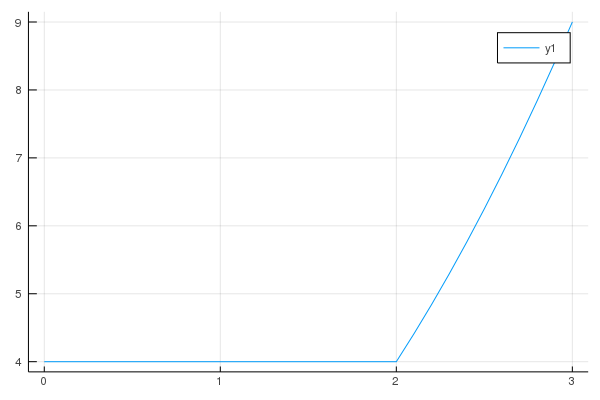

In [100]:
function snapabove(g, a)
    function f(x)
        if x > a         # "a" is captured in the closure f
            return g(x)
        else
            return g(a)
        end
    end
    return f    # closure with the embedded a
end

f(x) = x^2
h = snapabove(f, 2.0)

using Plots

gr(fmt=:png);
plot(h, 0.0:0.1:3.0)

### Loops

The `for` and `while` loops also introduce a local scope, and you can roughly reason about them the same way you would a function/closure.

In particular

In [101]:
for i in 1:2  # introduces local i
    dval1 = i
    println(i)
end

# @show (i, dval1)  # would fail as neither exists in this scope

for i in 1:2  # introduces a different local i
    println(i)
end

1
2


1
2


On the other hand just as with closures, if a variable is already defined it will be available in the inner scope.

In [102]:
dval2 = 0  # introduces variables
for i in 1:2   # introduces local i
    dval2 = i  # refers to outer variable
end

dval2 # still can't refer to `i`

2

Similarly, for while loops

In [103]:
val = 1.0
tol = 0.002
while val > tol
    old = val
    val = val / 2
    difference = val - old
end

@show val;
# @show difference fails, not in scope

val = 0.001953125


### A Quick Check for Scoping Design

While we have argued against global variables as poor practice, you may have noticed that in Jupyter notebooks we have been using them throughout.

Here, global variables are used in an interactive editor because they are convenient, and not because they are essential to the design of functions.

A simple test of the difference is to take a segment of code and wrap it in a function, for example

In [104]:
x = 2.0
f(y) = x + y
z = f(4.0)

for i in 1:3
    z += i
end

println("z = $z")

z = 12.0


Here, the `x` and `z` are global variables, the function `f` refers to the global variable `x`, and the global variable `z` is modified in the `for` loop.

However, you can simply wrap the entire code in a function

In [105]:
function wrapped()
    x = 2.0
    f(y) = x + y
    z = f(4.0)

    for i in 1:3
        z += i
    end

    println("z = $z")
end

wrapped()

z = 12.0


Now, there are no global variables.

While it is convenient to skip wrapping our code throughout, in general you will want to wrap any performance sensitive code in this way.

## Exercises


<a id='pyess-ex1'></a>

### Exercise 1

Part 1: Given two numeric arrays or tuples `x_vals` and `y_vals` of equal length, compute
their inner product using `zip()`.

Part 2: Using a comprehension, count the number of even numbers between 0 and 99.

- Hint: `iseven` returns `true` for even numbers and `false` for odds.  


Part 3: Using a comprehension, take `pairs = ((2, 5), (4, 2), (9, 8), (12, 10))` and count the number of pairs `(a, b)` such that both `a` and `b` are even.


<a id='pyess-ex2'></a>

### Exercise 2

Consider the polynomial


<a id='equation-polynom0'></a>
$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Using `enumerate()` in your loop, write a function `p` such that `p(x, coeff)` computes the value in [(1)](#equation-polynom0) given a point `x` and an array of coefficients `coeff`.


<a id='pyess-ex3'></a>

### Exercise 3

Write a function that takes a string as an argument and returns the number of capital letters in the string.

Hint: `uppercase("foo")` returns `"FOO"`.


<a id='pyess-ex4'></a>

### Exercise 4

Write a function that takes two sequences `seq_a` and `seq_b` as arguments and
returns `true` if every element in `seq_a` is also an element of `seq_b`, else
`false`.

- By “sequence” we mean an array, tuple or string.  



<a id='pyess-ex5'></a>

### Exercise 5

The Julia libraries include functions for interpolation and approximation.

Nevertheless, let’s write our own function approximation routine as an exercise.

In particular, write a function `linapprox` that takes as arguments

- A function `f` mapping some interval $ [a, b] $ into $ \mathbb R $.  
- two scalars `a` and `b` providing the limits of this interval.  
- An integer `n` determining the number of grid points.  
- A number `x` satisfying `a ≤ x ≤ b`.  


and returns the [piecewise linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) of `f` at `x`, based on `n` evenly spaced grid points `a = point[1] < point[2] < ... < point[n] = b`.

Aim for clarity, not efficiency.

Hint: use the function `range` to linearly space numbers.

### Exercise 6

The following data lists US cities and their populations.

Copy this text into a text file called `us_cities.txt` and save it in your present working directory.

- That is, save it in the location Julia returns when you call `pwd()`.  


This can also be achieved by running the following Julia code:

In [106]:
open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

167

Write a program to calculate total population across these cities.

Hints:

- If `f` is a file type then `eachline(f)` provides an iterable that steps you through the lines in the file.  
- `parse(Int, "100")` converts the string `"100"` into an integer.  



<a id='pyess-ex7'></a>

### Exercise 7

Redo Exercise 5 except

1. Pass in a range instead of the `a, b,` and `n`.  Test with a range such as `nodes = -1.0:0.5:1.0`.  
1. Instead of the `while` used in the solution to Exercise 5, find a better way to efficiently bracket the `x` in the nodes.  


Hints:
* Rather than the signature as `function linapprox(f, a, b, n, x)`, it should be called as `function linapprox(f, nodes, x)`.
* `step(nodes), length(nodes), nodes[1]`, and `nodes[end]` may be useful.
* Type `?÷` into jupyter to explore quotients from Euclidean division for more efficient bracketing.

## Solutions

### Exercise 1

Part 1 solution:

Here’s one possible solution

In [107]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum(x * y for (x, y) in zip(x_vals, y_vals))

6

Part 2 solution:

One solution is

In [108]:
sum(iseven, 0:99)

50

Part 3 solution:

Here’s one possibility

In [109]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum(xy -> all(iseven, xy), pairs)

2

### Exercise 2

In [110]:
p(x, coeff) = sum(a * x^(i-1) for (i, a) in enumerate(coeff))

p (generic function with 1 method)

In [111]:
p(1, (2, 4))

6

### Exercise 3

Here’s one solutions:

In [112]:
function f_ex3(string)
    count = 0
    for letter in string
        if (letter == uppercase(letter)) && isletter(letter)
            count += 1
        end
    end
    return count
end

f_ex3("The Rain in Spain")

3

### Exercise 4

Here’s one solutions:

In [113]:
function f_ex4(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if a ∉ seq_b
            is_subset = false
        end
    end
    return is_subset
end

# test
println(f_ex4([1, 2], [1, 2, 3]))
println(f_ex4([1, 2, 3], [1, 2]))

true
false


if we use the Set data type then the solution is easier

In [114]:
f_ex4_2(seq_a, seq_b) = Set(seq_a) ⊆ Set(seq_b) # \subseteq (⊆) is unicode for `issubset`

println(f_ex4_2([1, 2], [1, 2, 3]))
println(f_ex4_2([1, 2, 3], [1, 2]))

true
false


### Exercise 5

In [115]:
function linapprox(f, a, b, n, x)
    # evaluates the piecewise linear interpolant of f at x,
    # on the interval [a, b], with n evenly spaced grid points.

    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # find first grid point larger than x
    point = a
    while point ≤ x
        point += step
    end

    # x must lie between the gridpoints (point - step) and point
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox (generic function with 1 method)

Let’s test it

In [116]:
f_ex5(x) = x^2
g_ex5(x) = linapprox(f_ex5, -1, 1, 3, x)

g_ex5 (generic function with 1 method)

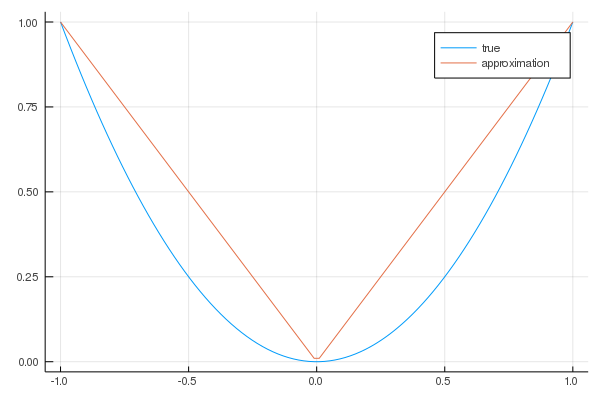

In [117]:
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex5.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")

### Exercise 6

In [118]:
f_ex6 = open("us_cities.txt", "r")
total_pop = 0
for line in eachline(f_ex6)
    city, population = split(line, ':')  # tuple unpacking
    total_pop += parse(Int, population)
end
close(f_ex6)
println("Total population = $total_pop")

Total population = 23831986
